In [1]:
#Importando a biblioteca pandas
import pandas as pd

In [2]:
#Criando nosso dataframe
df = pd.read_excel(r"C:\Users\ftspu\OneDrive\Documentos\Material Curso\Painel2.1_Vendas\Dados\Natal.xlsx")

In [3]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.0,853,2
1,Natal,2018-11-25,563.0,853,2
2,Natal,2019-03-11,308.0,852,3
3,Natal,2019-01-07,271.0,854,3
4,Natal,2019-03-09,699.0,853,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
Cidade    240 non-null object
Data      240 non-null object
Vendas    240 non-null float64
LojaID    240 non-null int64
Qtde      240 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.5+ KB


In [5]:
df["Data"] = df["Data"].astype("object")

In [7]:
df["Data"] = pd.to_datetime(df["Data"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
Cidade    240 non-null object
Data      240 non-null datetime64[ns]
Vendas    240 non-null float64
LojaID    240 non-null int64
Qtde      240 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 9.5+ KB


In [9]:
#Agrupamento por ano
agrupamento_ano = df.groupby(df["Data"].dt.year)["Vendas"].sum()

In [10]:
agrupamento_ano

Data
2018    22481.00
2019    36706.76
Name: Vendas, dtype: float64

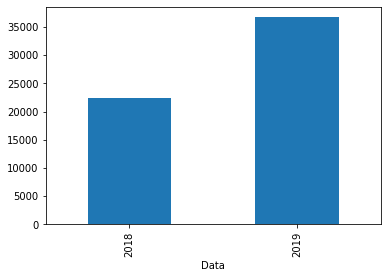

In [11]:
df.groupby(df["Data"].dt.year)["Vendas"].sum().plot.bar()

In [12]:
#Criando uma coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda
0,Natal,2018-08-27,606.0,853,2,2018
1,Natal,2018-11-25,563.0,853,2,2018
2,Natal,2019-03-11,308.0,852,3,2019
3,Natal,2019-01-07,271.0,854,3,2019
4,Natal,2019-03-09,699.0,853,3,2019


In [14]:
#Extraindo o mês e o dia da venda
df["Mes_venda"], df["Dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [15]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda,Mes_venda,Dia_venda
0,Natal,2018-08-27,606.0,853,2,2018,8,27
1,Natal,2018-11-25,563.0,853,2,2018,11,25
2,Natal,2019-03-11,308.0,852,3,2019,3,11
3,Natal,2019-01-07,271.0,854,3,2019,1,7
4,Natal,2019-03-09,699.0,853,3,2019,3,9


In [16]:
#Descobrindo a data mais antiga em nosso conjunto de dados
df["Data"].min()

Timestamp('2018-01-05 00:00:00')

In [17]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda,Mes_venda,Dia_venda,diferenca_dias
0,Natal,2018-08-27,606.0,853,2,2018,8,27,234 days
1,Natal,2018-11-25,563.0,853,2,2018,11,25,324 days
2,Natal,2019-03-11,308.0,852,3,2019,3,11,430 days
3,Natal,2019-01-07,271.0,854,3,2019,1,7,367 days
4,Natal,2019-03-09,699.0,853,3,2019,3,9,428 days


In [19]:
#Criando uma coluna com o semestre
df["Semestre_venda"] = df["Data"].dt.quarter

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda,Mes_venda,Dia_venda,diferenca_dias,Semestre_venda
0,Natal,2018-08-27,606.0,853,2,2018,8,27,234 days,3
1,Natal,2018-11-25,563.0,853,2,2018,11,25,324 days,4
2,Natal,2019-03-11,308.0,852,3,2019,3,11,430 days,1
3,Natal,2019-01-07,271.0,854,3,2019,1,7,367 days,1
4,Natal,2019-03-09,699.0,853,3,2019,3,9,428 days,1


In [21]:
#Obtendo subconjuntos
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [22]:
vendas_marco_2019.head()

,Cidade,Data,Vendas,LojaID,Qtde,Ano_Venda,Mes_venda,Dia_venda,diferenca_dias,Semestre_venda
2,Natal,2019-03-11,308.0,852,3,2019,3,11,430 days,1
4,Natal,2019-03-09,699.0,853,3,2019,3,9,428 days,1
5,Natal,2019-03-30,674.0,854,2,2019,3,30,449 days,1
7,Natal,2019-03-18,886.0,853,4,2019,3,18,437 days,1
8,Natal,2019-03-27,667.0,852,4,2019,3,27,446 days,1
